In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.interpolate import interp1d

import corner

from utils import (
    rcparams,
    to_GeV_per_cubic_femtometre,
    to_nucleons_per_cubic_femtometre,
)
plt.rcParams.update(rcparams)

In [2]:
collated_eos_path = [
    'collated_np_all_post.csv', 
    '/home/isaac.legred/PTAnalysis/Analysis/collated_np_all_post.csv'
    ][0]

eos_dir = ['eos-draws', '/home/philippe.landry/nseos/eos/gp/mrgagn'][0]

In [17]:
# Load the collated EOSs and filter out the ones with zero weight
collated_eos = pd.read_csv(collated_eos_path)
nonzero_collated_eos = collated_eos[collated_eos.logweight_total > -np.inf]

# The pre-computed weights of these EOSs
weights = np.exp(nonzero_collated_eos.logweight_total.values)

# The marginalised QCD weights
marg_weights = np.loadtxt('weights/qcd_weights_marg.dat')

In [18]:
len(weights), len(marg_weights)

(80162, 80162)

In [19]:
ntov_array = to_nucleons_per_cubic_femtometre(nonzero_collated_eos['rhoc(M@Mmax)'])

In [20]:
exclude_mask = ntov_array < 0.16*35

weights = weights[exclude_mask]
marg_weights = marg_weights[exclude_mask]

In [21]:
len(weights), len(marg_weights)

(80153, 80153)

In [22]:
pressure_at_ntov = np.loadtxt('ntov_quantities/pressure.dat')
energy_density_at_ntov = np.loadtxt('ntov_quantities/energy_density.dat')

In [23]:
len(pressure_at_ntov), len(energy_density_at_ntov)

(80153, 80153)

In [15]:
len(e_list), len(p_list)

(1999, 1999)

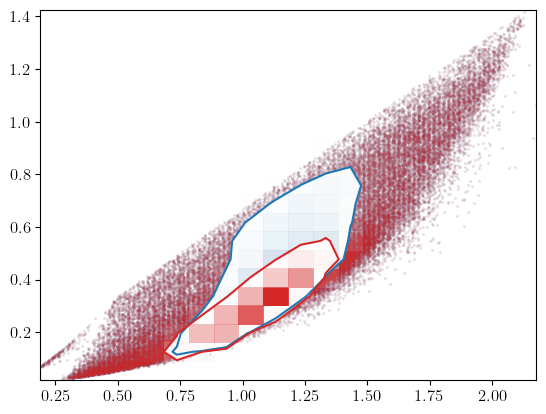

In [24]:
fig, ax = plt.subplots()

corner.hist2d(
    energy_density_at_ntov, 
    pressure_at_ntov, 
    ax=ax,
    weights=weights, 
    bins=20, 
    levels=[0.9],
    color='C0'
    )

corner.hist2d(
    energy_density_at_ntov, 
    pressure_at_ntov, 
    ax=ax,
    weights=weights*marg_weights,
    bins=20, 
    levels=[0.9],
    color='C3'
    )